In [1]:
import datetime
from threading import Thread
import random
import math
from queue  import Queue
import pandas as pd 
import warnings
import time
import trie as trie
import pickle
import matplotlib.pyplot as plt
import copy
import matplotlib.ticker as ticker
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from scipy import spatial
import matplotlib.pyplot as plt

import SatadishaModule_final_trie as phase1

# import phase2_Trie_baseline_reintroduction_effectiveness as phase2
import phase2_Trie_baseline_reintroduction_efficiency as phase2
# import phase2_Trie_just_reintroduction as phase2 #just reintroduction, eviction without experimental result computation
# import phase2_Trie_just_reintroduction_alternate as phase2 # testing reintroduction with various thresholds in unified framework
# import phase2_Trie_reintroduction as phase2
# import phase2_Trie_just_eviction_alternate as phase2 # testing eviction with various thresholds in unified framework

# from sklearn.decomposition import PCA as sklearnPCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy
import scipy.stats as st
import os
import sys

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# tweets=pd.read_csv("/home/satadisha/Desktop/GitProjects/data/jimJordanKnew.csv",sep =',')
tweets=pd.read_csv("/Users/satadisha/Documents/GitHub/jimJordanKnew.csv",sep =',')
# tweets=pd.read_csv("/home/satadisha/Desktop/GitProjects/data/tweets_1million_for_others.csv",sep =',')
# tweets=tweets[['ID', 'HashTags', 'Tweet IDs', 'Time', 'TweetText', 'User']]

print(len(tweets))
tweets['Time'] =  pd.to_datetime(tweets['Time'])
tweets = tweets.sort_values(by='Time',ascending=True)
# tweets=tweets[tweets.Time.notnull()][50000:]
length=len(tweets)
batch_size=500
val=math.ceil(length/batch_size)-1

print('# of batches: ',(val+1))
max_batch_value=val
z_score=-0.1119

print(list(tweets.columns.values))

25927
# of batches:  52
['ID', 'HashTags', 'TweetIDs', 'Time', 'TweetText', 'User']


In [3]:
# print(tweets.head(100))
Phase1= phase1.SatadishaModule()
Phase2 = phase2.EntityResolver()

hello


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
length=len(tweets)
print(length,batch_size)
batch_count=0
batch_epoch=[]
service_rate=[]
service_time=[]

for g, tweet_batch in tweets.groupby(np.arange(length) //batch_size):
    batch_epoch.append(tweet_batch['Time'].values[-1])
# 	batch_epoch.append(tweet_batch['Time'].values[-1])

    #send batch to TwiLIGHT
    time_in=time.time()
    tuple_of= Phase1.extract(tweet_batch,batch_count)
    tweet_base=tuple_of[0]
    candidate_base=tuple_of[1]
    phase2stopwordList=tuple_of[4]
    
    reintroduction_threshold_dummy=2
    candidate_base_post_Phase2, converted_candidates, complete_tweet_dataframe_grouped_df_sorted,phase2_output_time= Phase2.executor(max_batch_value,tweet_base,candidate_base,phase2stopwordList,z_score,reintroduction_threshold_dummy,tweet_base)
    time_out=phase2_output_time
    service_time.append((time_out-time_in))
    rate=500/(time_out-time_in)
    service_rate.append(rate)
    batch_count+=1
    
# 	print(tweet_batch['Time'].values[-1])
print(batch_epoch[:10])
print(service_time[:10])

print(batch_epoch[1]-batch_epoch[0])
epoch_diff=[(t - s)/np.timedelta64(1, 's') for s, t in zip(batch_epoch[:-1], batch_epoch[1:])]

25927 500
Phase I extracting now
0
ambiguous_candidates_in_batch:  0
6 1 0
incomplete sentences:  0
mentions discovered: 698
Phase I extracting now


/Users/satadisha/Documents/GitHub/TwiCSv2/production_code/phase2_Trie_baseline_reintroduction_efficiency.py:1746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  candidate_featureBase_DF['status'][candidate_featureBase_DF['probability']>=0.65]='g'
/Users/satadisha/Documents/GitHub/TwiCSv2/production_code/phase2_Trie_baseline_reintroduction_efficiency.py:1747: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  candidate_featureBase_DF['status'][(candidate_featureBase_DF['probability'] > 0.4) & (candidate_featureBase_DF['probability'] < 0.65)] = 'a'
/Users/satadisha/Documents/GitHub/TwiCSv2/production_code/phase2_Trie_baseline_reintroduction_efficiency.py:1748:

0
ambiguous_candidates_in_batch:  0


/Users/satadisha/Documents/GitHub/TwiCSv2/production_code/phase2_Trie_baseline_reintroduction_efficiency.py:568: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  candidate_featureBase_DF_oldScores['probability']=np.array([self.candidates_w_scores[x] for x in candidate_featureBase_DF_oldScores['candidate'].values])#np.vectorize(lambda x: self.candidates_w_scores[x])
/Users/satadisha/Documents/GitHub/TwiCSv2/production_code/SVM.py:490: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x_test['normalized_cap']=x_test['cap']/x_test['cumulative']
/User

8 1 0
incomplete sentences:  0
mentions discovered: 735
Phase I extracting now
0
ambiguous_candidates_in_batch:  0
10 1 0
incomplete sentences:  0
mentions discovered: 1528
Phase I extracting now
0
ambiguous_candidates_in_batch:  0
11 3 0
incomplete sentences:  0
mentions discovered: 415
Phase I extracting now
0
ambiguous_candidates_in_batch:  0
19 3 0
incomplete sentences:  0
mentions discovered: 1055
Phase I extracting now
0
ambiguous_candidates_in_batch:  0
19 4 1
incomplete sentences:  4
mentions discovered: 1227
Phase I extracting now
4
ambiguous_candidates_in_batch:  0
19 4 1
incomplete sentences:  4
mentions discovered: 1504
Phase I extracting now
4
ambiguous_candidates_in_batch:  0
19 4 1
incomplete sentences:  0
mentions discovered: 1504
Phase I extracting now
0
ambiguous_candidates_in_batch:  0
19 4 1
incomplete sentences:  0
mentions discovered: 1500
Phase I extracting now
0
ambiguous_candidates_in_batch:  0
25 4 1
incomplete sentences:  0
mentions discovered: 1591
Phase I e

In [5]:
print(len(batch_epoch),len(epoch_diff),len(service_time))
print(epoch_diff[0])
print(service_time)

52 51 52
661.0
[0.9406259059906006, 1.1996660232543945, 1.6549959182739258, 1.4518911838531494, 1.7332160472869873, 1.7148690223693848, 1.8321590423583984, 1.8322110176086426, 1.824018955230713, 1.8034069538116455, 1.7175519466400146, 1.2021958827972412, 1.3289930820465088, 1.335433006286621, 1.8291239738464355, 1.1623740196228027, 1.6958489418029785, 2.155918836593628, 2.147894859313965, 2.2266690731048584, 2.2260591983795166, 2.2340657711029053, 2.2726669311523438, 2.2252800464630127, 1.7558009624481201, 1.579725980758667, 1.8033552169799805, 1.7999601364135742, 1.927367925643921, 1.5604400634765625, 2.059868812561035, 1.656553030014038, 1.5539109706878662, 1.7471809387207031, 1.589540958404541, 1.5714430809020996, 2.0075690746307373, 1.7593529224395752, 1.5739238262176514, 1.265995979309082, 1.3864870071411133, 1.7260181903839111, 1.6597850322723389, 1.3351759910583496, 1.5432889461517334, 1.3284459114074707, 1.0752761363983154, 1.1746091842651367, 1.4257419109344482, 1.923249006271

In [6]:
#inter arrival times
print(epoch_diff)

[661.0, 1652.0, 664.0, 185.0, 720.0, 0.0, 0.0, 0.0, 367.0, 1244.0, 1504.0, 0.0, 109.0, 967.0, 297.0, 551.0, 0.0, 69.0, 0.0, 0.0, 0.0, 0.0, 0.0, 493.0, 232.0, 0.0, 0.0, 330.0, 1160.0, 0.0, 482.0, 0.0, 889.0, 1183.0, 1324.0, 2040.0, 2253.0, 1230.0, 371.0, 1083.0, 1215.0, 460.0, 1758.0, 949.0, 2312.0, 1367.0, 889.0, 2136.0, 1107.0, 3511.0, 3809.0]


In [7]:
# import seaborn as sns
# width=0.01
width=1.0
print(max(epoch_diff),min(epoch_diff))
bins=int((max(epoch_diff)-min(epoch_diff))/width)

# width2=1.0
width2=1.0
bins2=int((max(epoch_diff)-min(epoch_diff))/width2)

# plt.hist(epoch_diff, color = 'blue', edgecolor = 'black', bins = bins)
# # sns.distplot(epoch_diff, hist=True, #kde=True, 
# #              bins=bins, color = 'darkblue', 
# #              hist_kws={'edgecolor':'black'},
# #              kde_kws={'linewidth': 4})

# plt.title('Histogram of Inter-Arrival Time between Tweet Batches')
# plt.xlabel('Inter-Arrival Time in seconds')
# plt.ylabel('Frequency')

# plt.show()

3809.0 0.0


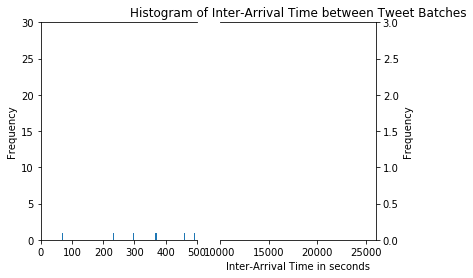

In [8]:
f, (axl, axr) = plt.subplots(1, 2, sharey=False)

# plot the same data on both axes
axl.hist(epoch_diff, bins)
axr.hist(epoch_diff, bins2)

# zoom-in / limit the view to different portions of the data
# axl.set_xlim(0.0, 1.0, 0.1) # outliers only
# axl.set_ylim(0, 70, 10)
axl.set_xlim(0.0, 500.0, 100.0) # outliers only
axl.set_ylim(0, 30, 5.0)

# axr.set_xlim(1.12, 10.0, 1.0)  # most of the data
# axr.set_ylim(0.0, 20.0, 5.0)

axr.set_xlim(10000, 26000, 5000)  # most of the data
axr.set_ylim(0.0, 3.0, 0.5)


# hide the spines between axl and axr
axl.spines['right'].set_visible(False)
axr.spines['left'].set_visible(False)

axl.yaxis.set_ticks_position("left")
axl.yaxis.tick_left()


axr.yaxis.set_ticks_position("right")
axr.yaxis.tick_right()

# axl.set_xlabel('Inter-Arrival Time in seconds')
axl.set_ylabel('Frequency')
axr.set_ylabel('Frequency')
axr.yaxis.set_label_position("right")
# How much space to leave between plots
plt.subplots_adjust(wspace=0.15)
plt.xlabel('Inter-Arrival Time in seconds')
plt.title('Histogram of Inter-Arrival Time between Tweet Batches')


plt.show()

In [9]:
pd.cut(np.array(epoch_diff), bins)

[(660.0, 661.0], (1651.0, 1652.0], (663.0, 664.0], (184.0, 185.0], (719.0, 720.0], ..., (888.0, 889.0], (2135.0, 2136.0], (1106.0, 1107.0], (3510.0, 3511.0], (3808.0, 3809.0]]
Length: 51
Categories (3809, interval[float64]): [(-3.809, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0] ... (3805.0, 3806.0] < (3806.0, 3807.0] < (3807.0, 3808.0] < (3808.0, 3809.0]]

In [10]:
hist, bins = np.histogram(epoch_diff, bins)
print(hist[:150])
print(hist[150:250])
# print(bins)

[14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
# hist2, bins2 = np.histogram(epoch_diff, bins2)
# print(hist2)
# print(bins2)

In [12]:
# width=100.0
# width=0.01
width=1.0
print(max(epoch_diff),min(epoch_diff))
bins3=int((max(epoch_diff)-min(epoch_diff))/width)

hist3, bins3 = np.histogram(epoch_diff, bins3)
print(hist3)
# print(bins3)
print(hist[:150])
print(hist[150:250])

3809.0 0.0
[14  0  0 ...  0  0  1]
[14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
# cumulative_freq=[sum(hist[:(i+1)]) for i in range(len(hist))]
# print(cumulative_freq)

In [14]:
# cumProb=[elem/cumulative_freq[-1] for elem in cumulative_freq]
# print(cumProb)

In [15]:
dist = st.expon
param = dist.fit(epoch_diff)

#loc, scale=1/lambda
print(param)
st.kstest(epoch_diff, dist.cdf, param)

(-5.665222362599571e-12, 815.1566635769223)


KstestResult(statistic=0.2745098039215617, pvalue=0.000689695090138498)

In [16]:
dist2 = st.gamma
param2 = dist2.fit(epoch_diff)

#loc, scale=1/lambda
print(param2)
st.kstest(epoch_diff, dist2.cdf, param2[:-2])

(0.7030625441746172, -3.4917301462460852e-25, 781.975220563837)


KstestResult(statistic=0.7254901960784313, pvalue=0.0)

In [17]:
dist3 = st.beta
param3 = dist3.fit(epoch_diff)

#loc, scale=1/lambda
print(param3)
st.kstest(epoch_diff, dist3.cdf, param3[:-2])

(0.6659717774114625, 8.119465761775832, -1.7927985418919856e-29, 7136.170159919713)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


KstestResult(statistic=0.7254901960784313, pvalue=0.0)

In [18]:
dist4 = st.norm
param4 = dist4.fit(epoch_diff)

#loc, scale=1/lambda
print(param4)
st.kstest(epoch_diff, dist4.cdf, param4[:-2])

(815.156862745098, 883.988562887353)


KstestResult(statistic=0.7254901960784313, pvalue=0.0)

In [19]:
# dist5 = st.uniform
# param5 = dist5.fit(epoch_diff)

# #loc, scale=1/lambda
# print(param5)
# st.kstest(epoch_diff, dist5.cdf, param5[:-2])

In [26]:
# size = 30000
# x=scipy.arange(start=0.0, stop=8.0, step=0.01)
# x=scipy.arange(start=0.0, stop=26000.0, step=1.0)
x=scipy.arange(start=0.0, stop=3900.0, step=1.0)
size=len(x)
pdf = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
print(pdf)
print(sum(pdf))

[1.22675805e-03 1.22525404e-03 1.22375187e-03 ... 1.02928977e-05
 1.02802785e-05 1.02676749e-05]
0.992248873648608


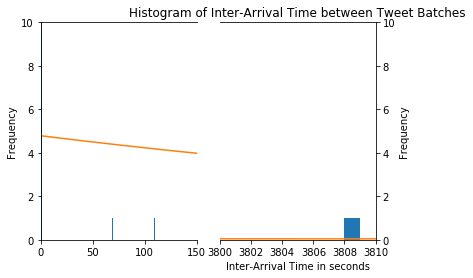

In [27]:
f, (axl, axr) = plt.subplots(1, 2, sharey=False)

# plot the same data on both axes
axl.hist(epoch_diff, bins)
axl.plot(pdf_fitted,label='fitted')

axr.hist(epoch_diff, bins2)
axr.plot(pdf_fitted,label='fitted')
# zoom-in / limit the view to different portions of the data
# axl.set_xlim(0.0, 1.0, 0.1) # outliers only
# axl.set_ylim(0.0, 15.0, 1.0)

axl.set_xlim(0.0, 150.0, 20.0) # outliers only
axl.set_ylim(0, 10.0, 1.0)

# axr.set_xlim(1.12, 10.0, 1.0)  # most of the data
# axr.set_ylim(0.0, 15.0, 1.0)

axr.set_xlim(3800, 3810, 1.0)  # most of the data
axr.set_ylim(0, 10.0, 1.0)


# hide the spines between axl and axr
axl.spines['right'].set_visible(False)
axr.spines['left'].set_visible(False)

axl.yaxis.set_ticks_position("left")
axl.yaxis.tick_left()


axr.yaxis.set_ticks_position("right")
axr.yaxis.tick_right()

# axl.set_xlabel('Inter-Arrival Time in seconds')
axl.set_ylabel('Frequency')
axr.set_ylabel('Frequency')
axr.yaxis.set_label_position("right")
# How much space to leave between plots
plt.subplots_adjust(wspace=0.15)
plt.xlabel('Inter-Arrival Time in seconds')
plt.title('Histogram of Inter-Arrival Time between Tweet Batches')


plt.show()

In [28]:
print(st.expon.mean(scale=param[-1]))
print(service_time)
mean_service_time=sum(service_time)/len(service_time)
print(mean_service_time)

815.1566635769223
[0.9406259059906006, 1.1996660232543945, 1.6549959182739258, 1.4518911838531494, 1.7332160472869873, 1.7148690223693848, 1.8321590423583984, 1.8322110176086426, 1.824018955230713, 1.8034069538116455, 1.7175519466400146, 1.2021958827972412, 1.3289930820465088, 1.335433006286621, 1.8291239738464355, 1.1623740196228027, 1.6958489418029785, 2.155918836593628, 2.147894859313965, 2.2266690731048584, 2.2260591983795166, 2.2340657711029053, 2.2726669311523438, 2.2252800464630127, 1.7558009624481201, 1.579725980758667, 1.8033552169799805, 1.7999601364135742, 1.927367925643921, 1.5604400634765625, 2.059868812561035, 1.656553030014038, 1.5539109706878662, 1.7471809387207031, 1.589540958404541, 1.5714430809020996, 2.0075690746307373, 1.7593529224395752, 1.5739238262176514, 1.265995979309082, 1.3864870071411133, 1.7260181903839111, 1.6597850322723389, 1.3351759910583496, 1.5432889461517334, 1.3284459114074707, 1.0752761363983154, 1.1746091842651367, 1.4257419109344482, 1.923249006

In [29]:
exp_arrival_rate=1/(st.expon.mean(scale=param[-1]))
exp_service_rate=1/(mean_service_time)
rho=exp_arrival_rate/exp_service_rate

print(exp_arrival_rate, exp_service_rate, rho)

0.001226758051160352 0.6047123582285848 0.0020286637679341594


In [33]:
exp_wait_time= rho/(2*exp_service_rate*(1-rho))
print('Expected wait time in queue:', exp_wait_time)

Expected wait time in queue: 0.001680788876600977


In [34]:
expected_wait_time_empirical=0
count=0
wait_time_vals=[]
wait_time_probs=[]

for i in range(len(epoch_diff)):
    
    if(epoch_diff[i]<mean_service_time):
        time_diff=mean_service_time-epoch_diff[i]
        prob=pdf[int(epoch_diff[i])]
        if(time_diff not in wait_time_vals):
            wait_time_vals.append(time_diff)
            wait_time_probs.append(round(prob,3))
#     count+=1

for i in range(len(wait_time_vals)):
    expected_wait_time_empirical+=wait_time_vals[i]*wait_time_probs[i]
print('Expected wait time in queue (empirical):',expected_wait_time_empirical)

Expected wait time in queue (empirical): 0.0016536787885885974
